# Introduction

In this project, we will attempt to greate a Generative Adversarial Network (GAN) in order to manipulate facial expressions.

Our first step is to load the neccessary libraries we will be using for the entire process.

In [18]:
#Loading the neccessary libraries
%matplotlib inline
import os
import cv2
import glob
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transform
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils

from skimage import io, transform
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import image
import warnings
warnings.filterwarnings('ignore')

We will now create a variable which points to our local directory. We create these variables as shortcut so we will not have to type the entire directory everytime needed. Take note that the image dataset/directory is located in a different folder than the python notebook files.

In [2]:
#Create Folder Paths to shorten directory
landmark = Path('''E:\Data_Cloud\GoogleDrive\Dataset\Landmark''')
wild = Path('''E:\Data_Cloud\GoogleDrive\Dataset\wild''')
crop_utkface = Path('''E:\Data_Cloud\GoogleDrive\Dataset\Crop''')

There are two landmark directories with 3 files in them and an image folder with two subdirectories namely crop_part1 and the UTKFace directory. In this next section, we will attempt to view the files. The landmark folders will be assigned to a dataframe and the images folder will be set up to view what some of the images may appear to be.

In [3]:
#Creating a dataframe for each of the landmark text files.
landmark1 = pd.read_csv(landmark/'landmark_list_part1.txt',header=None)
landmark2 = pd.read_csv(landmark/'landmark_list_part2.txt', header=None)
landmark3 = pd.read_csv(landmark/'landmark_list_part3.txt',header=None)

#Merging the 3 dataframes into one.
landmark_frame = pd.concat([landmark1, landmark2, landmark3])

With the second directory containing landmark files as well, we will also create a separate dataframe for each files, then merge them into one dataframe.

In [4]:
#Creating 3 dataframs for each of the files.
wild1 = pd.read_csv(wild/'landmark_list_part1.txt',header=None)
wild2 = pd.read_csv(wild/'landmark_list_part2.txt',header=None)
wild3 = pd.read_csv(wild/'landmark_list_part3.txt',header=None)

#Merging the three dataframes into one.
wild_frame = pd.concat([wild1, wild2, wild3])

### Exploring the Images in the Data Folder

Next, we will attempt to view what the images looks like in each of the two image folders. In the initial folder, crop_part1, we will pull 5 random images and observe how they appear.

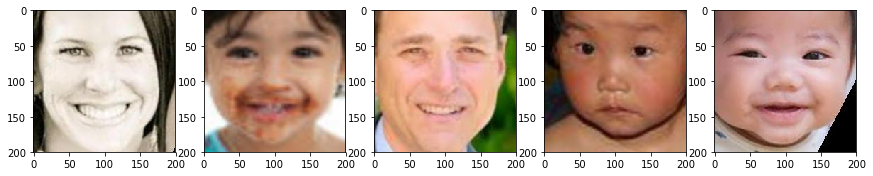

In [5]:
plt.figure(figsize=(30,30))

crop_folder = crop_utkface/'crop_part1'

for i in range(5):
    file = np.random.choice(os.listdir(crop_folder))
    image_path= os.path.join(crop_folder, file)
    image=mpimg.imread(image_path)
    plt.subplot(1,10,i+1)
    plt.imshow(image)

We will attempt the same procedure to the 'UTKFace' folder, but instead of getting several images, we will get one random images, then observe as we did previously.

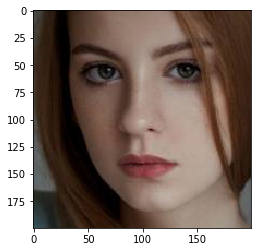

In [30]:
UTKFace_folder = crop_utkface/'UTKFace'

for i in range(1):
    file = np.random.choice(os.listdir(UTKFace_folder))
    image_path = os.path.join(UTKFace_folder, file)
    image=mpimg.imread(image_path)
    plt.imshow(image)

### Creation of a Python class

We will not create a class in order to pull images from the dataset. Unlike the previous precedures, we will not only view the dataset, but assign a class which we may use several times throughout. This class shall make it easier to load images and will be useful when creating the model at a later point.

In [7]:
#Creata a class to pull items from the image folder
class FaceDataset(Dataset):
    def __init__(self, main_dir):
        self.main_dir = main_dir
        #self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = glob.glob(os.path.join(main_dir, '*.jpg'))
        
    def __len__(self):
        return len(self.total_imgs)
    
    def __getitem__(self, index):
        img_loc = os.path.join(self.main_dir, self.total_imgs[index])
        image = io.imread(img_loc)
        #tensor_image = self.transform(image)
        return image

### Variable asignment

We now create a variable which will run the class on a specific folder. We will create two variable assignments which will be assigned to the two datasets that was provided with.

There are 9787 images in the crop_part1 folder


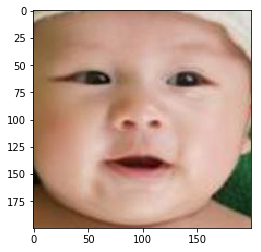

In [9]:
#Crearting a variable with the class and the crop_part1 folder
facedata_crop = FaceDataset(crop_folder)
print('There are {} images in the crop_part1 folder'.format(len(facedata_crop)))

#retreiving an specific image for observations. Image number 1573
plt.imshow(facedata_crop[1573])
plt.show()

There are 23708 images in the UTKFace folder


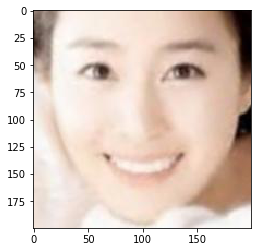

In [37]:
#Crearting a variable with the class and the UTKFace Folder
facedata_UTKFace = FaceDataset(UTKFace_folder)
print('There are {} images in the UTKFace folder'.format(len(facedata_UTKFace)))

#retreiving an specific image for observations. Image number 3997
plt.imshow(facedata_UTKFace[3997])
plt.show()

In [34]:
trans = transforms.Compose([
        transforms.Resize(256, 256),
        transforms.ToTensor()]) 

In [48]:
crop_dataloader = DataLoader(facedata_crop, batch_size=20, shuffle=False, sampler=None,
                             batch_sampler=None, num_workers=4, collate_fn=None,
                             pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None)

In [46]:
utk_dataloader = DataLoader(facedata_UTKFace, batch_size=1, shuffle=False, sampler=None,
                             batch_sampler=None, num_workers=0, collate_fn=None,
                             pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None)